# Build a classification model with Keras Functional API
Functional API is a way to create models that are more flexible than Sequential models. Models can have non-linear topology, shared layers, multiple inputs and outputs

### Importing libraraies

In [1]:
import os
import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session() # Destroys the current TF graph session and creates a new one - use if using same Python kernel

### Loading Dataset

#### Lower Back Pain Symptoms Dataset

Source: https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

In [2]:
spine_data = pd.read_csv('datasets/Dataset_spine.csv', 
                         skiprows=1,
                         names=['pelvic_incidence',
                                'pelvic tilt',
                                'lumbar_lordosis_angle',
                                'sacral_slope',
                                'pelvic_radius',
                                'degree_spondylolisthesis',
                                'pelvic_slope',
                                'direct_tilt',
                                'thoracic_slope',
                                'cervical_tilt',
                                'sacrum_angle',
                                'scoliosis_slope',
                                'class_att'])

spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [3]:
spine_data.head().T

,0,1,2,3,4
pelvic_incidence,31.484218,53.941658,57.286945,75.437748,46.442078
pelvic tilt,7.826221,9.306594,15.14935,31.539454,8.395036
lumbar_lordosis_angle,24.284818,43.100498,64.0,89.6,29.03723
sacral_slope,23.657997,44.635064,42.137595,43.898294,38.047043
pelvic_radius,113.833145,124.397821,116.735387,106.82959,115.481405
degree_spondylolisthesis,4.39308,25.082127,30.341203,54.965789,2.045476
pelvic_slope,0.713153,0.871551,0.431125,0.030341,0.806911
direct_tilt,9.7107,17.5525,22.253,8.763,27.8754
thoracic_slope,8.1003,17.5404,17.6755,11.0399,12.2285
cervical_tilt,11.85555,16.73581,12.20726,16.74065,9.55731


In [4]:
spine_data.shape

(310, 13)

In [5]:
spine_data.columns

Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'class_att'],
      dtype='object')

In [6]:
# Target variable
spine_data['class_att'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [7]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


C:\Users\user\.conda\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


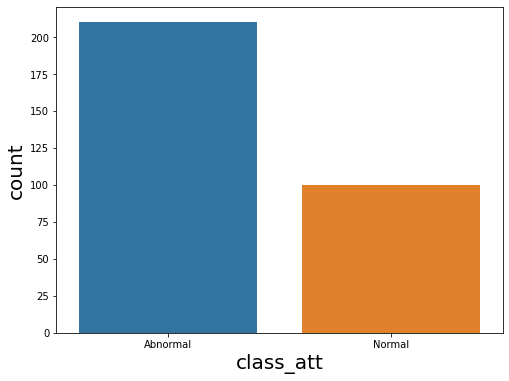

In [8]:
plt.figure(figsize=(8, 6))

sns.countplot('class_att', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('count', fontsize = 20)

plt.show()

C:\Users\user\.conda\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


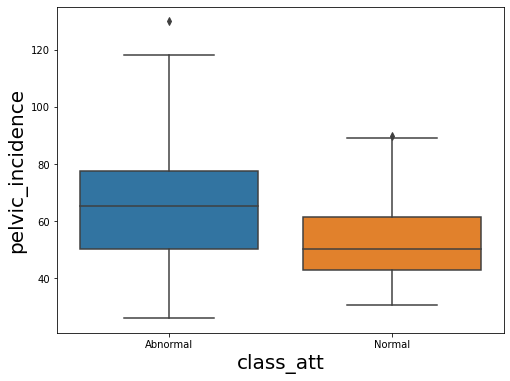

In [9]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'pelvic_incidence', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('pelvic_incidence', fontsize = 20)

plt.show()

C:\Users\user\.conda\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


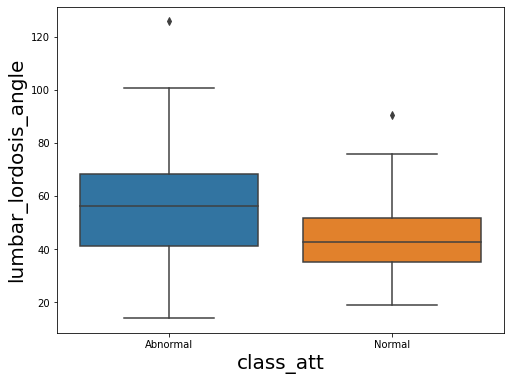

In [10]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'lumbar_lordosis_angle', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('lumbar_lordosis_angle', fontsize = 20)

plt.show()

C:\Users\user\.conda\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


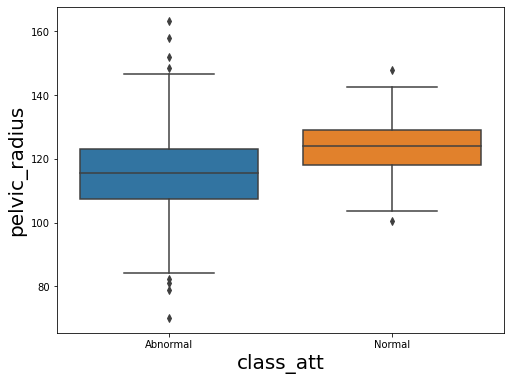

In [11]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'pelvic_radius', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('pelvic_radius', fontsize = 20)

plt.show()

### Replacing string values with integers in target column

In [12]:
class_att = {'Abnormal':0, 'Normal':1}

spine_data['class_att'].replace(class_att, inplace=True)

spine_data[['class_att']].sample(10)

,class_att
211,0
8,1
231,0
35,1
93,0
258,0
131,0
158,0
145,1
69,0


## Split into feature and target data frames

In [13]:
features = spine_data.drop('class_att', axis=1)

target = spine_data[['class_att']]

In [14]:
features.sample(5).T

,47,153,156,43,272
pelvic_incidence,42.021386,58.828379,60.419932,75.649731,63.027817
pelvic tilt,-6.554948,37.577873,5.265665,19.339799,22.552586
lumbar_lordosis_angle,67.900000,125.742385,59.814236,64.148685,39.609117
sacral_slope,48.576334,21.250506,55.154267,56.309932,40.475232
pelvic_radius,111.585782,135.629418,109.033074,95.903629,98.672917
degree_spondylolisthesis,27.338671,117.314683,30.265785,69.551303,-0.254400
pelvic_slope,0.986272,0.751482,0.916505,0.687092,0.744503
direct_tilt,15.636500,12.657600,35.031000,24.100400,12.566100
thoracic_slope,10.850400,15.938100,18.243700,13.344400,14.538600
cervical_tilt,16.201340,15.239200,11.953700,15.756020,15.304680


In [15]:
target.sample(5)

,class_att
166,1
143,0
95,1
177,0
35,1


## Standardise numeric variables

In [16]:
standardScaler = StandardScaler()

scaled_features = pd.DataFrame(standardScaler.fit_transform(features), 
                               columns=features.columns,
                               index=features.index)

scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,-9.213060e-17,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
pelvic tilt,310.0,2.075848e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
lumbar_lordosis_angle,310.0,1.534615e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
sacral_slope,310.0,-1.197071e-16,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
pelvic_radius,310.0,3.898315e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
degree_spondylolisthesis,310.0,1.790682e-18,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350
pelvic_slope,310.0,6.267388e-17,1.001617,-1.646397,-0.871329,0.010547,0.812640,1.842974
direct_tilt,310.0,1.070828e-16,1.001617,-1.657245,-0.958454,0.067895,0.884884,1.788002
thoracic_slope,310.0,2.019890e-16,1.001617,-1.775578,-0.779769,-0.037140,0.832300,1.844158
cervical_tilt,310.0,-4.419404e-16,1.001617,-1.697267,-0.828145,0.007103,0.844180,1.692090


In [17]:
scaled_features.shape

(310, 12)

### Splitting dataset into training and testing

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_features, 
                                                    target, 
                                                    test_size=0.15,
                                                    random_state=10)

In [19]:
x_train.shape, x_test.shape

((263, 12), (47, 12))

Further split the training data to create a validation set

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.15,
                                                  random_state=10)

In [21]:
x_train.shape, x_val.shape, x_test.shape

((223, 12), (40, 12), (47, 12))

In [22]:
y_train.shape, y_val.shape, y_test.shape

((223, 1), (40, 1), (47, 1))

### Building model

In [23]:
def build_and_compile_model():
    
    inputs = tf.keras.Input(shape=(x_train.shape[1],)) # define input layer

     # every layer instance is a callable. Accepts inputs and returns a tensor
    x = layers.Dense(16, activation='relu')(inputs) # fully connected layer

    x = layers.Dropout(0.3)(x)

    x = layers.Dense(8, activation='relu')(x)

    predictions = layers.Dense(1, activation='sigmoid')(x) # final layer with 1 neuron with probability
    
    # instantiate model
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    
    model.summary()
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), # adaptive learning optimizer. learning rate 0.001
              loss=tf.keras.losses.BinaryCrossentropy(), # appropriate loss function for binary classification
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(0.5), # 0.5 probability threshold
                       tf.keras.metrics.Recall(0.5),])
    return model

In [24]:
model = build_and_compile_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


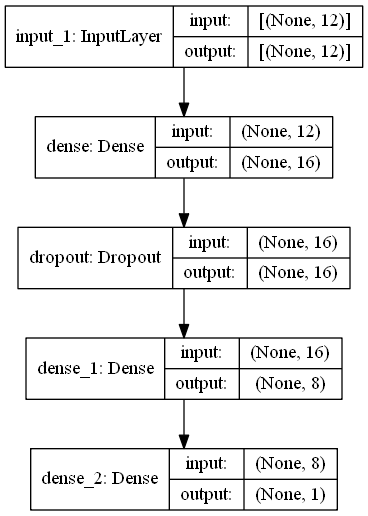

In [25]:
keras.utils.plot_model(model, 'model_classification_shapes.png', show_shapes=True)

## Convert datasets to tf.data.Dataset format - suitable for large data sets (enables distributed training processes)

In [26]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16) # batch size 16 records

dataset_train.shuffle(128) # shuffle training data with buffer size 128

<ShuffleDataset shapes: ((None, 12), (None, 1)), types: (tf.float64, tf.int64)>

In [27]:
num_epochs = 10

In [28]:
model.fit(dataset_train, epochs=num_epochs)

Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 0.7677 - accuracy: 0.5426 - precision: 0.3191 - recall: 0.4412
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5426 - precision: 0.2763 - recall: 0.3088    
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5695 - precision: 0.2667 - recall: 0.2353    
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.5830 - precision: 0.2807 - recall: 0.2353
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6188 - precision: 0.3191 - recall: 0.2206    
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.6278 - precision: 0.3077 - recall: 0.1765    
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.6592 - precision: 0.3824 - recall: 0.1912    
Epoch 8/10
14/14 [=================

In [29]:
# convert validation set to tf.data.Dataset format
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

Train model agamin but this mtime provide validation_data param with validation data set

In [30]:
model = build_and_compile_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 1s 28ms/step - loss: 0.7800 - accuracy: 0.5022 - precision_1: 0.2737 - reca

### Plotting accuracy and loss

In [31]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

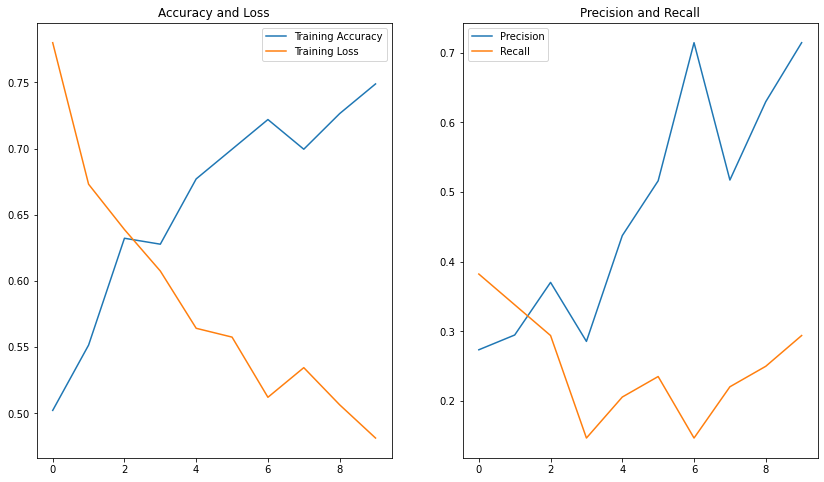

In [32]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_1']
recall = training_history.history['recall_1']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

### Performing prediction

In [33]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[0.28298405],
       [0.49340948],
       [0.36278892],
       [0.45621225],
       [0.5512503 ],
       [0.40549368],
       [0.5732138 ],
       [0.5314501 ],
       [0.39720896],
       [0.5361107 ]], dtype=float32)

In [34]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

In [35]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [36]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [37]:
pred_results.sample(10)

,y_test,y_pred
31,0,0
33,1,1
18,0,0
36,1,0
17,0,0
13,0,0
16,1,0
2,1,0
6,1,1
29,0,0


In [38]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,26,14
1,3,4


In [39]:
accuracy_score(y_test, y_pred)

0.6382978723404256

In [40]:
precision_score(y_test, y_pred)

0.5714285714285714

In [41]:
recall_score(y_test, y_pred)

0.2222222222222222

Create a model checpoint at a particular epoch. Can restart training from this checkpoint

In [42]:
ckpt_path = 'my_models/spine_classfication'
ckpt_dir = os.path.dirname(ckpt_path)

# create a checkpoint callback to save a checpoint after every 3 epochs
# only save weights, not architecture
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                   save_weights_only=True,
                                                   save_freq=3,
                                                   verbose=False)

In [43]:
model = build_and_compile_model()

model.fit(dataset_train, 
          epochs=num_epochs, 
          validation_data=dataset_val,
          verbose=False,
          callbacks=[ckpt_callback])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [45]:
!dir my_models

 Volume in drive C is Windows
 Volume Serial Number is 68A0-930F

 Directory of c:\Users\user\My_Learning\tensorflow\keras\build-machine-learning-workflow-keras-tensorflow\my_models

08/09/2021  12:14 PM    <DIR>          .
08/09/2021  12:14 PM    <DIR>          ..
08/09/2021  12:14 PM                95 checkpoint
08/09/2021  11:25 AM             1,730 relu_64_config.json
08/09/2021  11:25 AM    <DIR>          relu_64_config_weights
08/09/2021  11:15 AM            32,829 relu_64_weights.data-00000-of-00001
08/09/2021  11:15 AM             1,603 relu_64_weights.index
08/09/2021  12:14 PM             4,975 spine_classfication.data-00000-of-00001
08/09/2021  12:14 PM             1,250 spine_classfication.index
               6 File(s)         42,482 bytes
               3 Dir(s)  231,217,074,176 bytes free


In [46]:
y_pred = model.predict(x_test)

y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

accuracy_score(y_test, y_pred)

0.6170212765957447

Load weights of a model from the last saved checkpoint

In [47]:
reloaded_model = build_and_compile_model()

reloaded_model.load_weights(ckpt_path)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [48]:
y_pred = reloaded_model.predict(x_test)

y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

accuracy_score(y_test, y_pred)

0.6170212765957447

Continue training process for another 5 epochs

In [49]:
reloaded_model.fit(dataset_train, 
                   epochs=5, 
                   validation_data=dataset_val)

Epoch 1/5
14/14 [==============================] - 4s 47ms/step - loss: 0.4983 - accuracy: 0.7578 - precision_3: 0.6667 - recall_3: 0.4118 - val_loss: 0.5161 - val_accuracy: 0.7500 - val_precision_3: 0.8333 - val_recall_3: 0.3571
Epoch 2/5
14/14 [==============================] - 0s 5ms/step - loss: 0.5223 - accuracy: 0.7309 - precision_3: 0.5833 - recall_3: 0.4118 - val_loss: 0.5115 - val_accuracy: 0.7500 - val_precision_3: 0.8333 - val_recall_3: 0.3571
Epoch 3/5
14/14 [==============================] - 0s 5ms/step - loss: 0.4947 - accuracy: 0.7489 - precision_3: 0.6875 - recall_3: 0.3235 - val_loss: 0.5054 - val_accuracy: 0.7500 - val_precision_3: 0.8333 - val_recall_3: 0.3571
Epoch 4/5
14/14 [==============================] - 0s 6ms/step - loss: 0.4910 - accuracy: 0.7578 - precision_3: 0.6750 - recall_3: 0.3971 - val_loss: 0.5010 - val_accuracy: 0.7500 - val_precision_3: 0.8333 - val_recall_3: 0.3571
Epoch 5/5
14/14 [==============================] - 0s 5ms/step - loss: 0.4826 - acc

In [50]:
y_pred = reloaded_model.predict(x_test)

y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

accuracy_score(y_test, y_pred)

0.6595744680851063

# Use Tensorboard to monitor the model

In [51]:
# build and compile a new model
model = build_and_compile_model()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Specify directory to store logs
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Instantiate a tensorboard callback to track and visualise metrics during training
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # display every epoch (freq=1)

In [54]:
model.fit(dataset_train, 
          epochs=num_epochs, 
          validation_data=dataset_val,
          verbose=False,
          callbacks=[tensorboard_callback])

Once model has finished training, visualise training process with tensorboard Jupyter extension

In [55]:
%load_ext tensorboard

In [ ]:
## TODO recording: Here within the Jupyter Notebook, just select the various tabs and show
## what is in each tab. Scalars, graphs, distributions, histograms
## Then switch over to the terminal window and run Tensorboard there

Launch embedded Tensorboard within notebook - is slow and rather clunky 

In [56]:
%tensorboard --logdir logs/

Instead, from a terminal, run from the project directory: 
```bash
tensorboard --logdir logs/
```
And paste  http://localhost:6006/ into browser